In [21]:
## 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [22]:
import pandas as pd 

dataB = pd.read_csv("./Data/사전테스트-환경데이터/environmentsB.csv")
dataC = pd.read_csv("./Data/사전테스트-환경데이터/environmentsC.csv")
dataD = pd.read_csv("./Data/사전테스트-환경데이터/environmentsD.csv")
dataE = pd.read_csv("./Data/사전테스트-환경데이터/environmentsE.csv")

dataR = pd.read_excel("./Data/사전테스트-생육데이터.xlsx")



In [23]:
print(dataB.size)
print(dataC.size)
print(dataD.size)
print(dataE.size)


37920
34240
33856
33632


## 데이터 정규분포인지 확인하기(박스플롯)

<Axes: >

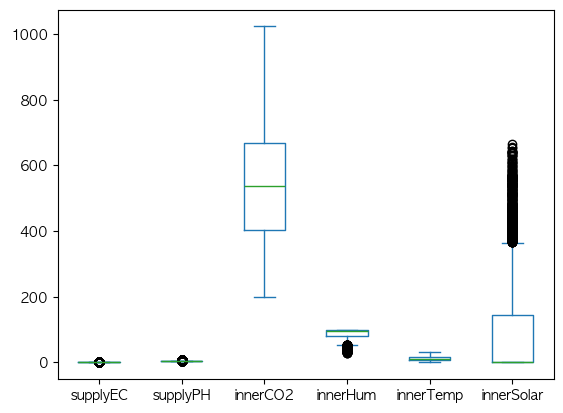

In [24]:
# import matplotlib.pyplot as plt
# import numpy as np


dataB.plot(kind='box')

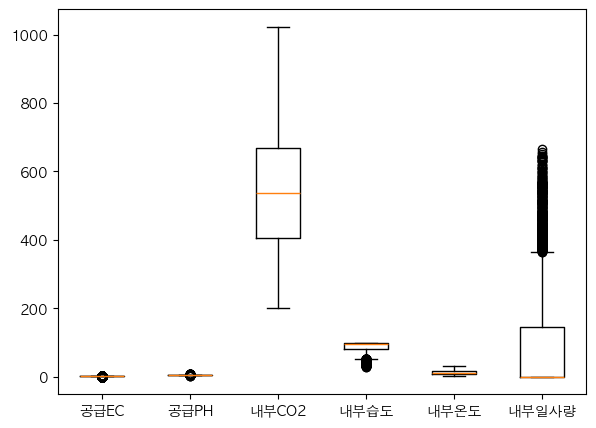

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)

ax1.boxplot(
    [
        dataB.supplyEC,
        dataB.supplyPH,
        dataB.innerCO2,
        dataB.innerHum,
        dataB.innerTemp,
        dataB.innerSolar,
    ],
    labels = ['공급EC', '공급PH', '내부CO2', '내부습도', '내부온도', '내부일사량']
)

plt.show()

In [26]:
# B ~ E농가 총 기간일 계산
from datetime import datetime

list = ['b','c','d','e']

startdate = [
    datetime(2023, 9, 9).date(),
    datetime(2023, 9, 20).date(),
    datetime(2023, 9, 20).date(),
    datetime(2023, 9, 20).date(),
]

enddate = [
    datetime(2024, 4, 24).date(),
    datetime(2024, 4, 26).date(),
    datetime(2024, 4, 24).date(),
    datetime(2024, 4, 26).date(),
]

for s, e, l in zip(startdate, enddate, list):
    duration = (e - s).days
    print(f"{l}농가 기간 : {duration}일")


b농가 기간 : 228일
c농가 기간 : 219일
d농가 기간 : 217일
e농가 기간 : 219일


------
## datetime date, time 분리

In [27]:
# datatime에서 날짜와 시간을 잘라서 df 만들기
# dataB['datetime'] = pd.to_datetime(dataB['datetime'])
# dataB['date'] = dataB['datetime'].dt.date
# dataB.head()

datalist = [dataB, dataC, dataD, dataE]

## datetime을 date로 변경 
for data in datalist:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['date'] = data['datetime'].dt.date
    data['time'] = data['datetime'].dt.hour
dataC

,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,date,time
0,C농가,2023-10-11 12:00:00,0.0,6.0,248.58,29.92,26.96,152.29,2023-10-11,12
1,C농가,2023-10-11 13:00:00,0.0,6.0,243.57,30.37,27.17,435.59,2023-10-11,13
2,C농가,2023-10-11 14:00:00,0.0,6.0,237.00,32.33,28.33,315.50,2023-10-11,14
3,C농가,2023-10-11 15:00:00,0.0,6.0,243.27,36.20,24.47,76.80,2023-10-11,15
4,C농가,2023-10-11 16:00:00,0.0,6.0,246.83,34.83,24.83,141.17,2023-10-11,16
...,...,...,...,...,...,...,...,...,...,...
4275,C농가,2024-04-26 19:00:00,1.0,6.0,269.80,68.75,18.61,63.36,2024-04-26,19
4276,C농가,2024-04-26 20:00:00,1.0,6.0,303.82,75.03,16.12,70.78,2024-04-26,20
4277,C농가,2024-04-26 21:00:00,1.0,6.0,345.05,77.49,14.56,71.22,2024-04-26,21
4278,C농가,2024-04-26 22:00:00,1.0,6.0,387.39,78.69,13.51,79.92,2024-04-26,22


----

### 생육주사 컬럼 이름 변경

In [28]:
# 생육주사 컬럼 이름 변경
dataR.rename(columns={'생육주사': '생육주차'}, inplace=True)
dataR

,시설아이디,생육주차,조사일자,표본번호,조사항목,단위,조사항목값
0,B농가,4,20231006,1,초장,mm,255.0
1,B농가,4,20231006,1,엽장,mm,79.0
2,B농가,4,20231006,1,엽폭,mm,70.0
3,B농가,4,20231006,1,엽병장,mm,139.0
4,B농가,4,20231006,1,엽수,개,5.0
...,...,...,...,...,...,...,...
9868,E농가,32,20240426,9,엽수,개,8.0
9869,E농가,32,20240426,9,관부직경,mm,27.9
9870,E농가,32,20240426,9,화방 꽃수(소화수),개,0.0
9871,E농가,32,20240426,9,착과수,개,0.0


-----

### 주차 df 만들기

In [29]:
from datetime import datetime, timedelta

base_dateB = datetime(2023, 10, 6)
base_dateC = datetime(2023, 9, 22)  
base_dateD = datetime(2023, 10, 18)  
base_dateE = datetime(2023, 9, 22)  

base_weekB = 4
base_weekC = 1
base_weekD = 4
base_weekE = 1

# 주차 계산 함수
def calculate_week(date, base_date, base_week):
    base_date_timestamp = pd.Timestamp(base_date)

    # 날짜 차이 계산
    delta_days = (date - base_date_timestamp).dt.days

    # 기준 주차에서 날짜 차이를 주 단위로 변환
    week = base_week + delta_days // 7
    return week


datesB = pd.to_datetime(dataB['date']) 
datesC = pd.to_datetime(dataC['date']) 
datesD = pd.to_datetime(dataD['date']) 
datesE = pd.to_datetime(dataE['date']) 

weeksB = calculate_week(datesB, base_dateB, base_weekB)
weeksC = calculate_week(datesC, base_dateC, base_weekC)
weeksD = calculate_week(datesD, base_dateD, base_weekD)
weeksE = calculate_week(datesE, base_dateE, base_weekE)

dataB['weeks'] = weeksB
dataC['weeks'] = weeksC
dataD['weeks'] = weeksD
dataE['weeks'] = weeksE

dataB.head()



,farm,datetime,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,date,time,weeks
0,B농가,2023-09-21 18:00:00,0.4,6.0,511.60,92.20,18.00,144.6,2023-09-21,18,1
1,B농가,2023-09-21 19:00:00,1.0,6.0,517.83,94.67,17.67,0.0,2023-09-21,19,1
2,B농가,2023-09-21 20:00:00,1.0,6.0,526.83,97.67,16.67,0.0,2023-09-21,20,1
3,B농가,2023-09-21 21:00:00,1.0,6.0,532.67,98.17,16.00,0.0,2023-09-21,21,1
4,B농가,2023-09-21 22:00:00,1.0,6.0,540.17,97.50,15.33,0.0,2023-09-21,22,1


In [30]:
# 주차와 input 데이터만 데이터셋으로 만듬
dataCC = dataC.iloc[: ,[2,3,4,5,6,7,10]]
dataBB = dataB.iloc[: ,[2,3,4,5,6,7,10]]
dataDD = dataD.iloc[: ,[2,3,4,5,6,7,10]]
dataEE = dataE.iloc[: ,[2,3,4,5,6,7,10]]

---
## B ~ E 데이터셋 합치기

In [31]:
dataT = pd.concat([dataBB, dataCC, dataDD, dataEE], ignore_index=True)
dataT.head()


,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,weeks
0,0.4,6.0,511.60,92.20,18.00,144.6,1
1,1.0,6.0,517.83,94.67,17.67,0.0,1
2,1.0,6.0,526.83,97.67,16.67,0.0,1
3,1.0,6.0,532.67,98.17,16.00,0.0,1
4,1.0,6.0,540.17,97.50,15.33,0.0,1


---

# 2시반 회의 결과 : 훈련데이터에 주차, 농가데이터가 있어야한다.

In [32]:
# 주차와 input 데이터만 데이터셋으로 만듬
dataC2 = dataC.iloc[: ,[0,2,3,4,5,6,7,10]]
dataB2 = dataB.iloc[: ,[0,2,3,4,5,6,7,10]]
dataD2 = dataD.iloc[: ,[0,2,3,4,5,6,7,10]]
dataE2 = dataE.iloc[: ,[0,2,3,4,5,6,7,10]]

dataE2


,farm,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,weeks
0,E농가,0.09,6.0,268.11,29.78,31.64,180.81,3
1,E농가,0.94,6.0,265.27,31.75,29.60,9.75,3
2,E농가,0.08,6.0,267.31,34.64,28.89,74.85,3
3,E농가,0.00,6.0,267.58,48.66,25.95,21.49,3
4,E농가,0.00,6.0,280.47,52.36,23.94,0.00,3
...,...,...,...,...,...,...,...,...
4199,E농가,0.00,6.0,287.09,62.90,23.20,75.07,32
4200,E농가,0.00,6.0,330.85,67.27,20.88,79.33,32
4201,E농가,0.00,6.0,356.48,68.93,19.61,82.90,32
4202,E농가,0.00,6.0,386.59,69.66,18.47,91.01,32


--- 
### CO2 컬럼 정규화 하기


In [33]:
from sklearn.preprocessing import MinMaxScaler
datalist2 = [dataB2, dataC2, dataD2, dataE2]

for data in datalist2:

    min_x = data['innerCO2'] - data['innerCO2'].min()
    min_max = data['innerCO2'].max() - data['innerCO2'].min()
    
    normalCO2 = min_x / min_max
    data['CO2'] = normalCO2
    

dataE2

/var/folders/kx/k_4qtb_x3sdfhb0lmwqxqw_h0000gn/T/ipykernel_95484/1361340706.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2'] = normalCO2
/var/folders/kx/k_4qtb_x3sdfhb0lmwqxqw_h0000gn/T/ipykernel_95484/1361340706.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2'] = normalCO2
/var/folders/kx/k_4qtb_x3sdfhb0lmwqxqw_h0000gn/T/ipykernel_95484/1361340706.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,farm,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,weeks,CO2
0,E농가,0.09,6.0,268.11,29.78,31.64,180.81,3,0.013802
1,E농가,0.94,6.0,265.27,31.75,29.60,9.75,3,0.013082
2,E농가,0.08,6.0,267.31,34.64,28.89,74.85,3,0.013600
3,E농가,0.00,6.0,267.58,48.66,25.95,21.49,3,0.013668
4,E농가,0.00,6.0,280.47,52.36,23.94,0.00,3,0.016937
...,...,...,...,...,...,...,...,...,...
4199,E농가,0.00,6.0,287.09,62.90,23.20,75.07,32,0.018615
4200,E농가,0.00,6.0,330.85,67.27,20.88,79.33,32,0.029712
4201,E농가,0.00,6.0,356.48,68.93,19.61,82.90,32,0.036211
4202,E농가,0.00,6.0,386.59,69.66,18.47,91.01,32,0.043847


In [35]:
dataT = pd.concat([dataB2, dataC2, dataD2, dataE2], ignore_index=True)
dataT

,farm,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,weeks,CO2
0,B농가,0.4,6.0,511.60,92.20,18.00,144.60,1,0.378615
1,B농가,1.0,6.0,517.83,94.67,17.67,0.00,1,0.386185
2,B농가,1.0,6.0,526.83,97.67,16.67,0.00,1,0.397120
3,B농가,1.0,6.0,532.67,98.17,16.00,0.00,1,0.404216
4,B농가,1.0,6.0,540.17,97.50,15.33,0.00,1,0.413329
...,...,...,...,...,...,...,...,...,...
17451,E농가,0.0,6.0,287.09,62.90,23.20,75.07,32,0.018615
17452,E농가,0.0,6.0,330.85,67.27,20.88,79.33,32,0.029712
17453,E농가,0.0,6.0,356.48,68.93,19.61,82.90,32,0.036211
17454,E농가,0.0,6.0,386.59,69.66,18.47,91.01,32,0.043847


In [36]:
dataT.rename(columns={"생육주차":"주차"}, inplace=True)

dataT.head()

,farm,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,weeks,CO2
0,B농가,0.4,6.0,511.60,92.20,18.00,144.6,1,0.378615
1,B농가,1.0,6.0,517.83,94.67,17.67,0.0,1,0.386185
2,B농가,1.0,6.0,526.83,97.67,16.67,0.0,1,0.397120
3,B농가,1.0,6.0,532.67,98.17,16.00,0.0,1,0.404216
4,B농가,1.0,6.0,540.17,97.50,15.33,0.0,1,0.413329


In [37]:
dataT.rename(columns={"주차":"weeks"}, inplace=True)
# pivot.rename(columns={"주차":"weeks"}, inplace=True)

In [38]:
# pivot = pivot.iloc[:,1:]

-----
## 시간대별, 농가별, 주차별의 평균으로 데이터셋 만들기


In [39]:
dataB3 = dataB.iloc[:, [0,2,3,4,5,6,7,9,10]]
dataC3 = dataC.iloc[:, [0,2,3,4,5,6,7,9,10]]
dataD3 = dataD.iloc[:, [0,2,3,4,5,6,7,9,10]]
dataE3 = dataE.iloc[:, [0,2,3,4,5,6,7,9,10]]
dataE3

,farm,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,time,weeks
0,E농가,0.09,6.0,268.11,29.78,31.64,180.81,14,3
1,E농가,0.94,6.0,265.27,31.75,29.60,9.75,15,3
2,E농가,0.08,6.0,267.31,34.64,28.89,74.85,16,3
3,E농가,0.00,6.0,267.58,48.66,25.95,21.49,17,3
4,E농가,0.00,6.0,280.47,52.36,23.94,0.00,18,3
...,...,...,...,...,...,...,...,...,...
4199,E농가,0.00,6.0,287.09,62.90,23.20,75.07,19,32
4200,E농가,0.00,6.0,330.85,67.27,20.88,79.33,20,32
4201,E농가,0.00,6.0,356.48,68.93,19.61,82.90,21,32
4202,E농가,0.00,6.0,386.59,69.66,18.47,91.01,22,32


In [40]:
groupB = dataB3.iloc[:, 1:].groupby(['weeks','time']).mean()
grpB_reset = groupB.reset_index()
grpB_reset

,weeks,time,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,1,18,0.4,6.0,511.600000,92.200000,18.000000,144.600000
1,1,19,1.0,6.0,517.830000,94.670000,17.670000,0.000000
2,1,20,1.0,6.0,526.830000,97.670000,16.670000,0.000000
3,1,21,1.0,6.0,532.670000,98.170000,16.000000,0.000000
4,1,22,1.0,6.0,540.170000,97.500000,15.330000,0.000000
...,...,...,...,...,...,...,...,...
745,32,19,1.0,6.0,633.195000,99.778333,13.390000,0.583333
746,32,20,1.0,6.0,604.861667,99.778333,12.445000,0.000000
747,32,21,1.0,6.0,576.166667,99.805000,11.945000,0.000000
748,32,22,1.0,6.0,580.500000,99.890000,11.640000,0.000000


In [41]:
grpB_reset[grpB_reset['weeks'] == 2]

,weeks,time,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
6,2,0,1.0,6.000000,532.287143,93.238571,16.024286,0.000000
7,2,1,1.0,6.000000,534.998571,95.094286,15.834286,0.000000
8,2,2,1.0,6.000000,536.690000,95.782857,15.524286,0.000000
9,2,3,1.0,6.000000,533.857143,94.525714,15.881429,0.000000
10,2,4,1.0,6.000000,532.951429,93.070000,15.951429,0.000000
11,2,5,1.0,6.000000,531.761429,92.191429,16.118571,0.000000
12,2,6,1.0,6.000000,532.714286,93.618571,16.071429,2.975714
13,2,7,1.0,6.000000,525.594286,92.524286,16.595714,45.214286
14,2,8,1.0,6.000000,506.951429,86.141429,18.475714,127.142857
15,2,9,1.0,6.000000,488.894286,79.737143,20.428571,216.607143


-----
# 주차별 시간별 그래프 보기

### 주차별 시간대별 B농가  innerHum, innerCO2 평균 그래프

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/py

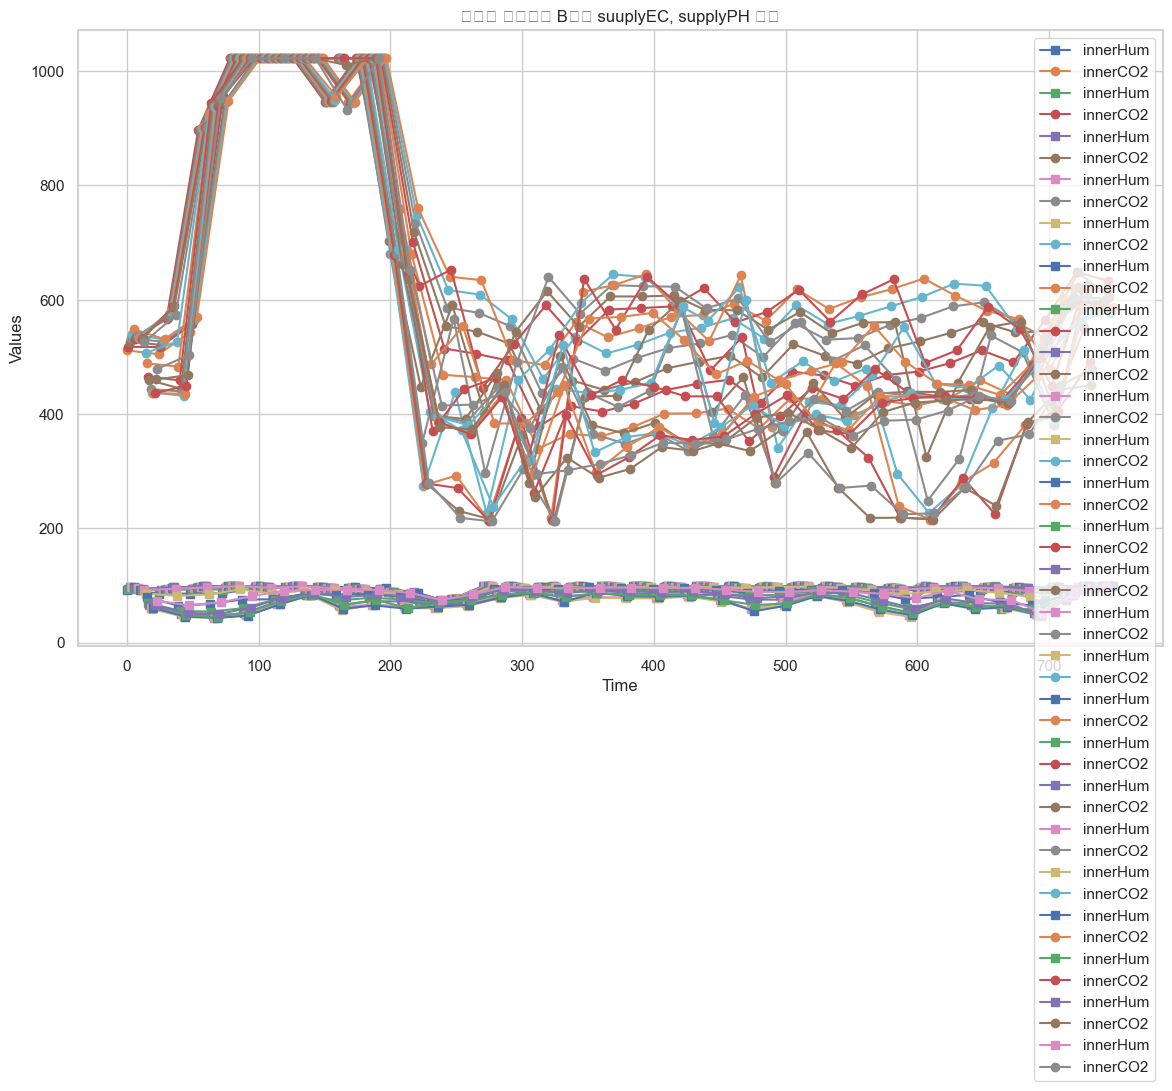

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 선 그래프 생성
plt.figure(figsize=(14, 8))

# 시간대별로 다른 선을 그리기 위해 시간대 리스트 생성
times = grpB_reset['time'].unique()


# 각 시간대에 대해 선 그래프 생성
for time in times:
    subset = grpB_reset[grpB_reset['time'] == time]
    plt.plot(subset['innerHum'], marker='s',  label=f'innerHum')
    # plt.plot(subset['innerTemp'], marker='^', linestyle='--', label=f'innerTemp')
    plt.plot(subset['innerCO2'], marker='o',  label=f'innerCO2')
    # plt.plot(subset['innerSolar'], marker='^', linestyle='--', label=f'innerSolar')

# 그래프 제목 및 축 라벨 설정
plt.title('주차별 시간대별 B농가 suuplyEC, supplyPH 평균')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()


----
# 주차별 시간대별 B농가의 suuplyEC, supplyPH 평균 그래프

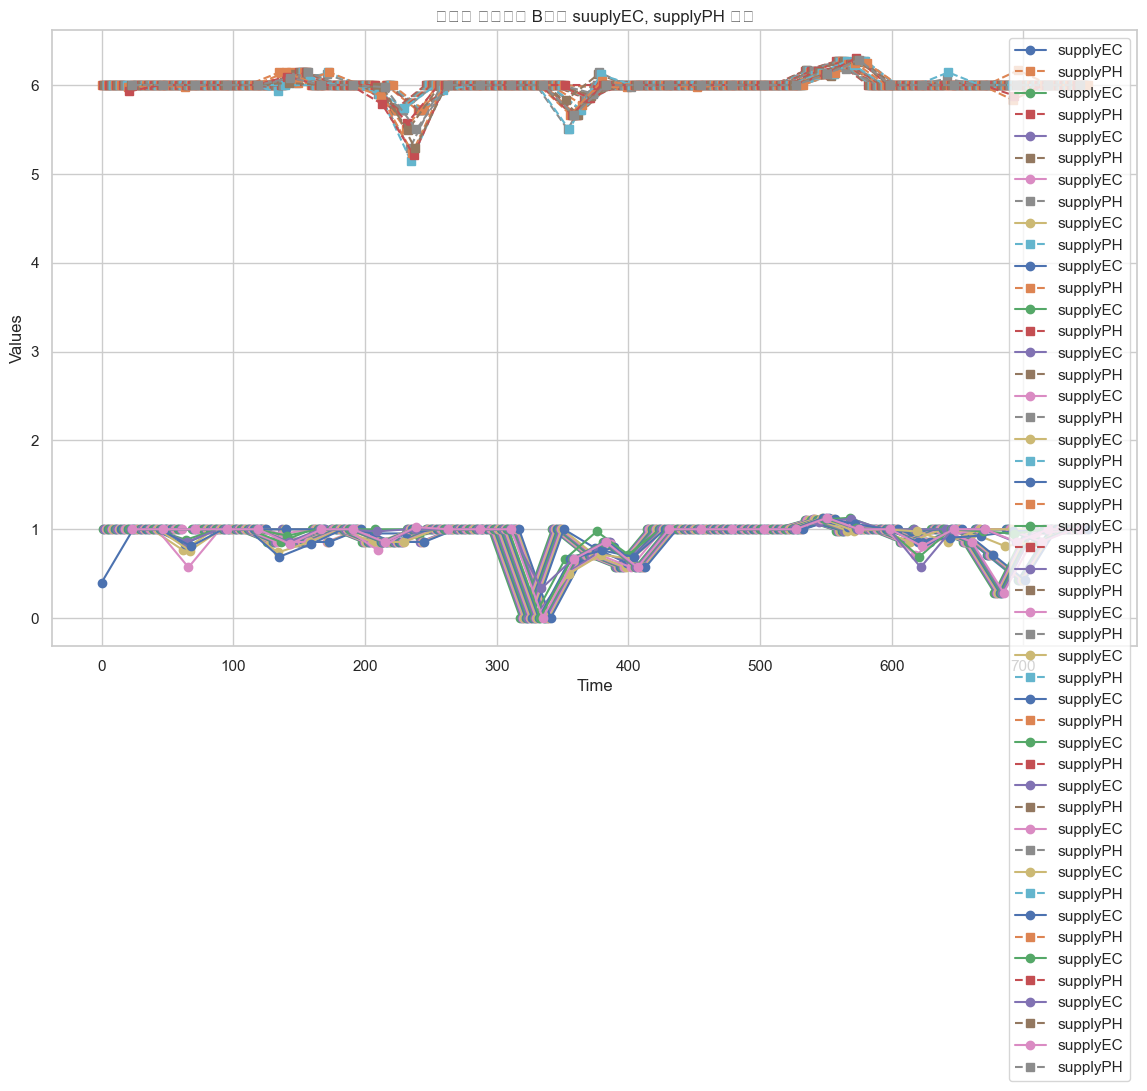

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 선 그래프 생성
plt.figure(figsize=(14, 8))

# 시간대별로 다른 선을 그리기 위해 시간대 리스트 생성
times = grpB_reset['time'].unique()


# 각 시간대에 대해 선 그래프 생성
for time in times:
    subset = grpB_reset[grpB_reset['time'] == time]
    plt.plot(subset['supplyEC'], marker='o', label=f'supplyEC')
    plt.plot(subset['supplyPH'], marker='s', linestyle='--', label=f'supplyPH')

# 그래프 제목 및 축 라벨 설정
plt.title('주차별 시간대별 B농가 suuplyEC, supplyPH 평균')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()


----
# 주차별 시간대별 B농가의 innerSolar 평균 그래프

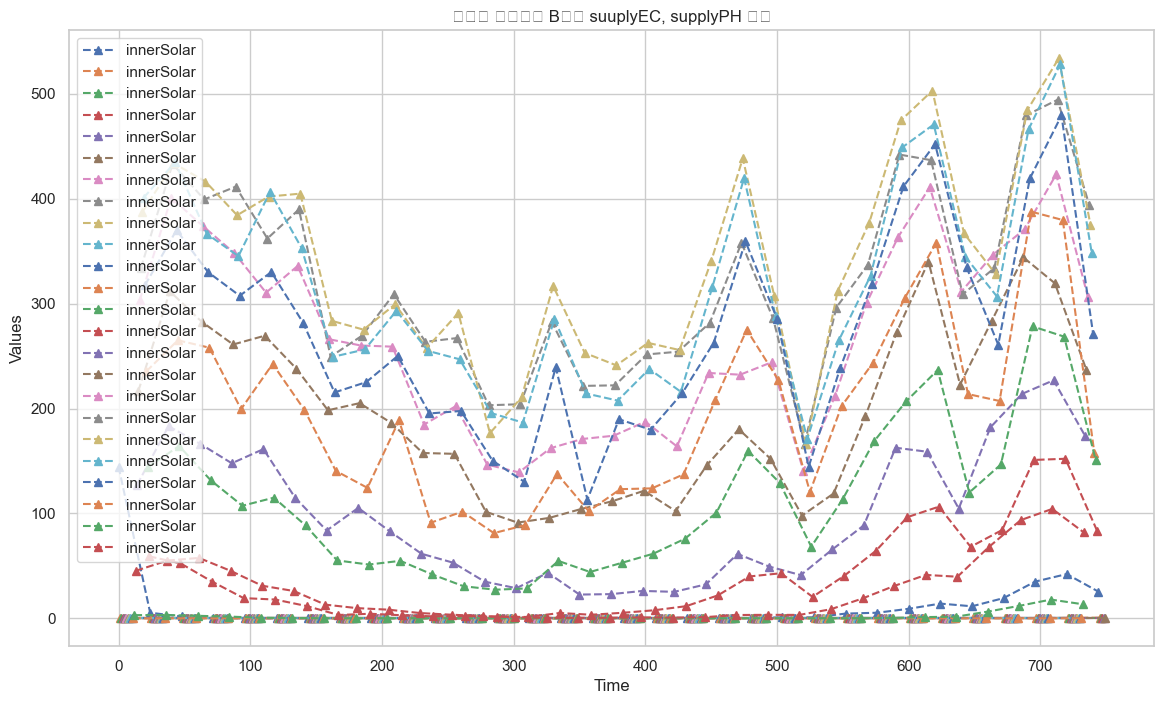

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 선 그래프 생성
plt.figure(figsize=(14, 8))

# 시간대별로 다른 선을 그리기 위해 시간대 리스트 생성
times = grpB_reset['time'].unique()


# 각 시간대에 대해 선 그래프 생성
for time in times:
    subset = grpB_reset[grpB_reset['time'] == time]
    plt.plot(subset['innerSolar'], marker='^', linestyle='--', label=f'innerSolar')

# 그래프 제목 및 축 라벨 설정
plt.title('주차별 시간대별 B농가 suuplyEC, supplyPH 평균')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()


> 주차별, 시간대 추세가 비슷한 것 같은데 농가별로 그려보자

In [45]:
groupE = dataE3.iloc[:, 1:].groupby(['weeks','time']).mean()
groupC = dataC3.iloc[:, 1:].groupby(['weeks','time']).mean()
groupD = dataD3.iloc[:, 1:].groupby(['weeks','time']).mean()

grpE_reset = groupE.reset_index()
grpD_reset = groupD.reset_index()
grpC_reset = groupC.reset_index()


In [120]:
dataE3.iloc[:, 1:].groupby(['weeks','time']).min().reset_index().iloc[:, 2:]

,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar
0,0.0,6.0,308.11,53.06,20.59,0.00
1,0.0,6.0,307.66,53.60,19.87,0.00
2,0.0,6.0,285.12,54.11,19.82,0.00
3,0.0,6.0,299.01,53.10,19.42,0.00
4,0.0,6.0,312.19,52.91,18.95,0.00
...,...,...,...,...,...,...
715,0.0,6.0,287.09,62.90,23.20,75.07
716,0.0,6.0,330.85,67.27,20.88,79.33
717,0.0,6.0,356.48,68.93,19.61,82.90
718,0.0,6.0,386.59,69.66,18.47,91.01


---
# 농가별 주차별, 시간별 innerHum 그래프

/var/folders/kx/k_4qtb_x3sdfhb0lmwqxqw_h0000gn/T/ipykernel_95484/958340635.py:28: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  plt.tight_layout()
/var/folders/kx/k_4qtb_x3sdfhb0lmwqxqw_h0000gn/T/ipykernel_95484/958340635.py:28: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


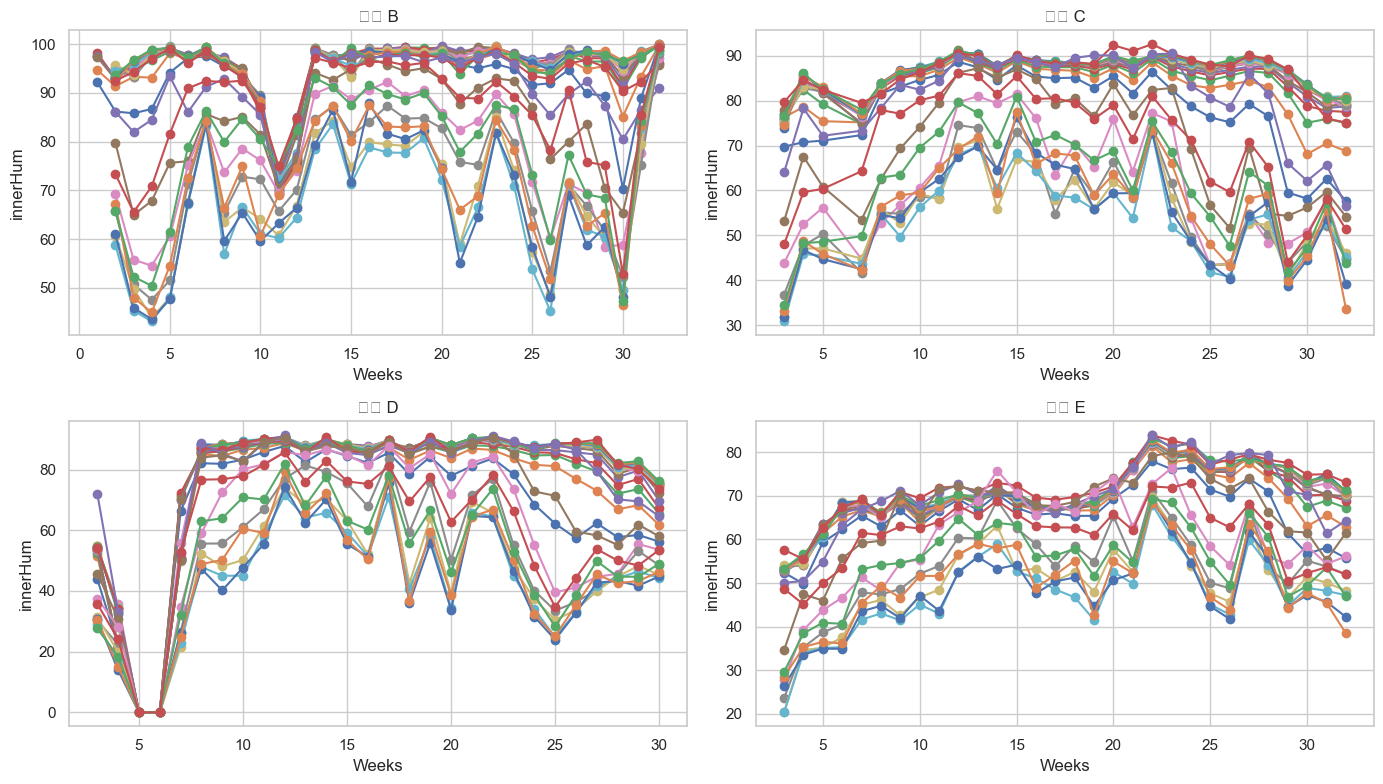

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# 시간대별로 다른 선을 그리기 위해 시간대 리스트 생성
times = grpB_reset['time'].unique()


# 각 서브플롯에 대해 선 그래프 생성
for ax, (label, subset) in zip(axs.flatten(), 
                            zip(['B', 'C', 'D', 'E'], [grpB_reset, grpC_reset, grpD_reset, grpE_reset])):
    for time in times:
        subset_time = subset[subset['time'] == time]
        ax.plot(subset_time['weeks'], subset_time['innerHum'], marker='o', label=f'{time}')

    # 그래프 제목 및 축 라벨 설정
    ax.set_title(f'농가 {label}')
    ax.set_xlabel('Weeks')
    ax.set_ylabel('innerHum')
    # ax.legend()
    ax.grid(True)

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

--- 
# 주차별 시간별 농가의 innserSolor

/var/folders/kx/k_4qtb_x3sdfhb0lmwqxqw_h0000gn/T/ipykernel_95484/2174920731.py:28: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  plt.tight_layout()
/var/folders/kx/k_4qtb_x3sdfhb0lmwqxqw_h0000gn/T/ipykernel_95484/2174920731.py:28: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()


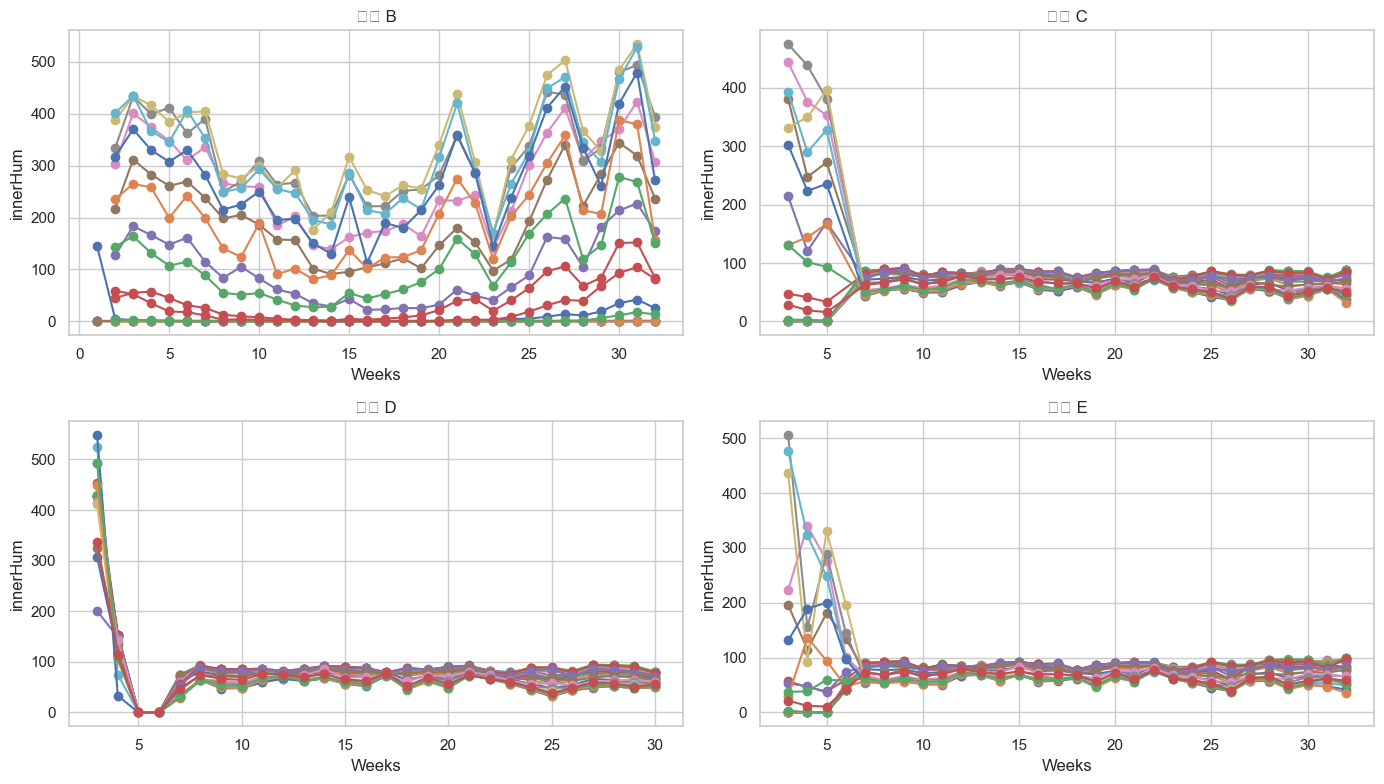

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# 시간대별로 다른 선을 그리기 위해 시간대 리스트 생성
times = grpB_reset['time'].unique()


# 각 서브플롯에 대해 선 그래프 생성
for ax, (label, subset) in zip(axs.flatten(), 
                            zip(['B', 'C', 'D', 'E'], [grpB_reset, grpC_reset, grpD_reset, grpE_reset])):
    for time in times:
        subset_time = subset[subset['time'] == time]
        ax.plot(subset_time['weeks'], subset_time['innerSolar'], marker='o', label=f'{time}')

    # 그래프 제목 및 축 라벨 설정
    ax.set_title(f'농가 {label}')
    ax.set_xlabel('Weeks')
    ax.set_ylabel('innerHum')
    # ax.legend()
    ax.grid(True)

# 전체 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

================================================================

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/py

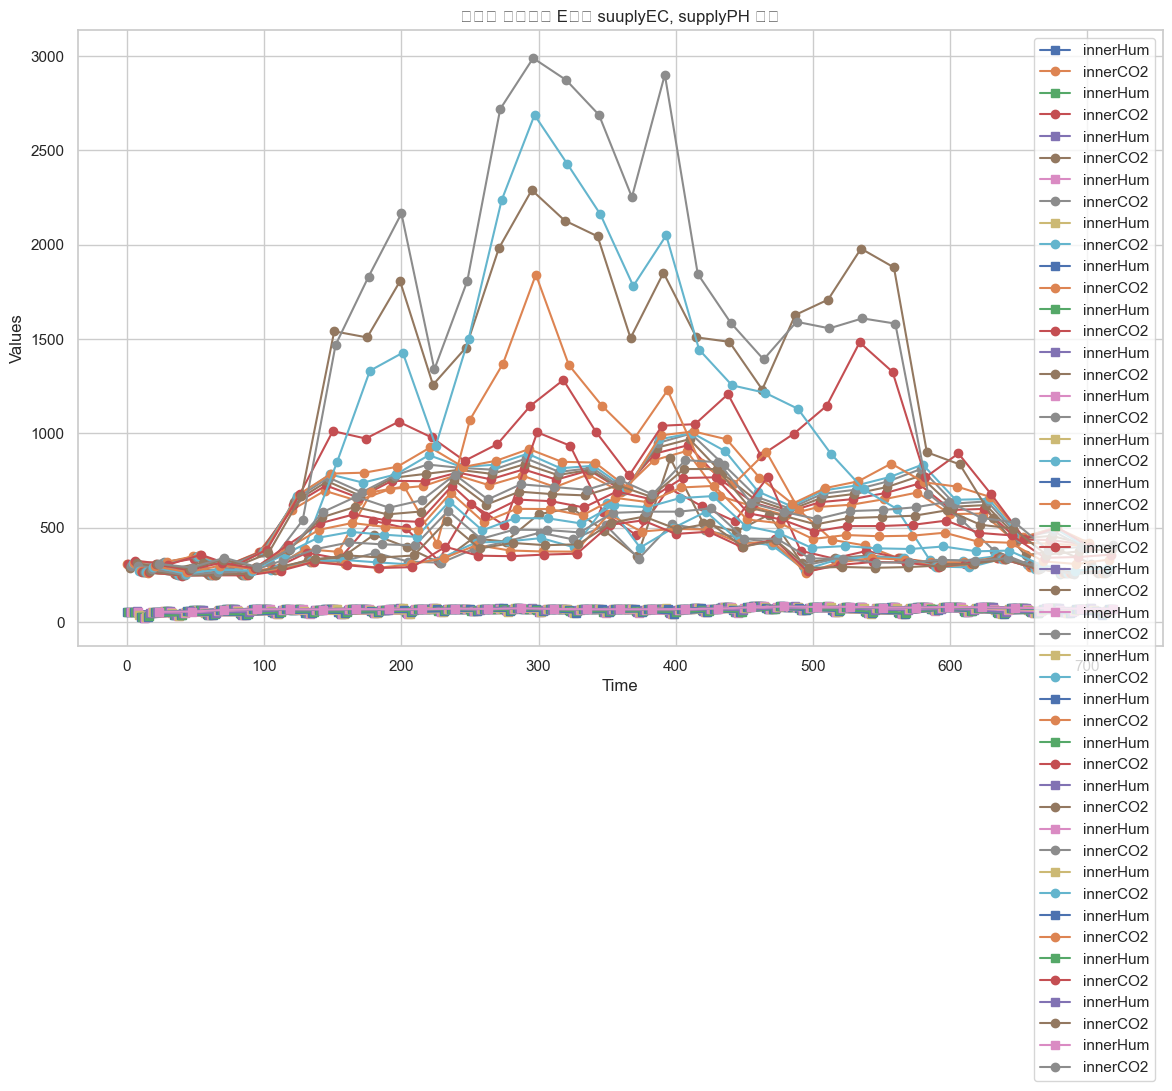

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 선 그래프 생성
plt.figure(figsize=(14, 8))

# 시간대별로 다른 선을 그리기 위해 시간대 리스트 생성
times = grpE_reset['time'].unique()


# 각 시간대에 대해 선 그래프 생성
for time in times:
    subset = grpE_reset[grpE_reset['time'] == time]
    plt.plot(subset['innerHum'], marker='s',  label=f'innerHum')
    # plt.plot(subset['innerTemp'], marker='^', linestyle='--', label=f'innerTemp')
    plt.plot(subset['innerCO2'], marker='o',  label=f'innerCO2')
    # plt.plot(subset['innerSolar'], marker='^', linestyle='--', label=f'innerSolar')

# 그래프 제목 및 축 라벨 설정
plt.title('주차별 시간대별 E농가 suuplyEC, supplyPH 평균')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()


---
# grpB_reset ~ grpE_reset 농가 컬럼 추가

In [56]:

grpB_reset['시설아이디'] = 'B농가'
grpC_reset['시설아이디'] = 'C농가'
grpD_reset['시설아이디'] = 'D농가'
grpE_reset['시설아이디'] = 'E농가'

grpE_reset.head()

,weeks,time,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,시설아이디
0,3,0,0.0,6.0,308.11,53.06,20.59,0.0,E농가
1,3,1,0.0,6.0,307.66,53.60,19.87,0.0,E농가
2,3,2,0.0,6.0,285.12,54.11,19.82,0.0,E농가
3,3,3,0.0,6.0,299.01,53.10,19.42,0.0,E농가
4,3,4,0.0,6.0,312.19,52.91,18.95,0.0,E농가


---
# grpB_reset ~ grpE_reset 데이터 하나로 합치기(concat)

In [63]:
totalData = pd.concat([grpB_reset, grpC_reset, grpD_reset, grpE_reset],  ignore_index=True)
totalData.tail()

,weeks,time,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,시설아이디
2833,32,19,0.0,6.0,287.09,62.90,23.20,75.07,E농가
2834,32,20,0.0,6.0,330.85,67.27,20.88,79.33,E농가
2835,32,21,0.0,6.0,356.48,68.93,19.61,82.90,E농가
2836,32,22,0.0,6.0,386.59,69.66,18.47,91.01,E농가
2837,32,23,0.0,6.0,408.73,70.00,18.00,93.68,E농가


---
# totalData의 weeks 컬럼명을 생육주사로 변경


In [64]:
totalData.rename(columns={"weeks":"생육주사"}, inplace=True)
totalData.head()


,생육주사,time,supplyEC,supplyPH,innerCO2,innerHum,innerTemp,innerSolar,시설아이디
0,1,18,0.4,6.0,511.60,92.20,18.00,144.6,B농가
1,1,19,1.0,6.0,517.83,94.67,17.67,0.0,B농가
2,1,20,1.0,6.0,526.83,97.67,16.67,0.0,B농가
3,1,21,1.0,6.0,532.67,98.17,16.00,0.0,B농가
4,1,22,1.0,6.0,540.17,97.50,15.33,0.0,B농가


----
# output Data 불러오기

In [61]:
outputData = pd.read_csv("./Data/pivoted.csv")

outputData = outputData.iloc[:, 1:]
outputData


,시설아이디,생육주사,조사일자,표본번호,관부직경,엽병장,엽수,엽장,엽폭,착과수,초장,최종화방차수,화방 꽃수(소화수)
0,B농가,4,20231006,1,12.39,139.0,5.0,79.0,70.0,0.0,255.0,0.0,0.0
1,B농가,4,20231006,2,12.59,146.0,5.0,78.0,77.0,0.0,251.0,0.0,0.0
2,B농가,4,20231006,3,13.91,100.0,6.0,73.0,68.0,0.0,209.0,0.0,0.0
3,B농가,4,20231006,4,10.36,111.0,4.0,83.0,80.0,0.0,264.0,0.0,0.0
4,B농가,4,20231006,5,9.48,203.0,3.0,94.0,94.0,0.0,307.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,E농가,32,20240426,5,19.17,220.0,7.0,78.0,70.0,0.0,352.0,3.0,0.0
1093,E농가,32,20240426,6,29.35,307.0,6.0,97.0,87.0,0.0,480.0,3.0,0.0
1094,E농가,32,20240426,7,29.94,288.0,8.0,83.0,70.0,0.0,452.0,3.0,0.0
1095,E농가,32,20240426,8,23.65,319.0,4.0,95.0,81.0,0.0,495.0,3.0,0.0


---
# outputData에서 D농가의 7주차 데이터 버리기


In [130]:
condition = (outputData['시설아이디'] == 'D농가') & (outputData['생육주사'] == 7)
outputData = outputData[~condition]


,시설아이디,생육주사,조사일자,표본번호,관부직경,엽병장,엽수,엽장,엽폭,착과수,초장,최종화방차수,화방 꽃수(소화수)


-----
# totalData의 컬럼명 변경하기

In [137]:
totalData.columns = ['생육주사','time','supplyEC_mean', 'supplyPH_mean', 'innerCO2_mean', 'innerHum_mean', 'innerTemp_mean', 'innerSolar_mean', '시설아이디']
totalData.head()

,생육주사,time,supplyEC_mean,supplyPH_mean,innerCO2_mean,innerHum_mean,innerTemp_mean,innerSolar_mean,시설아이디
0,1,18,0.4,6.0,511.60,92.20,18.00,144.6,B농가
1,1,19,1.0,6.0,517.83,94.67,17.67,0.0,B농가
2,1,20,1.0,6.0,526.83,97.67,16.67,0.0,B농가
3,1,21,1.0,6.0,532.67,98.17,16.00,0.0,B농가
4,1,22,1.0,6.0,540.17,97.50,15.33,0.0,B농가


-----
# totalData와 outputData 데이터 [시설아이디]와 [생육주사]에 대해서 inner join 

In [138]:
df = pd.merge(totalData, outputData,
                    on=['시설아이디', '생육주사'],
                    how='inner'
                )
print(df)

       생육주사  time  supplyEC_mean  supplyPH_mean  innerCO2_mean  innerHum_mean  \
0         4     0            1.0            6.0     897.022857      98.191429   
1         4     0            1.0            6.0     897.022857      98.191429   
2         4     0            1.0            6.0     897.022857      98.191429   
3         4     0            1.0            6.0     897.022857      98.191429   
4         4     0            1.0            6.0     897.022857      98.191429   
...     ...   ...            ...            ...            ...            ...   
23947    32    23            0.0            6.0     408.730000      70.000000   
23948    32    23            0.0            6.0     408.730000      70.000000   
23949    32    23            0.0            6.0     408.730000      70.000000   
23950    32    23            0.0            6.0     408.730000      70.000000   
23951    32    23            0.0            6.0     408.730000      70.000000   

       innerTemp_mean  inne

In [139]:
df.head()

,생육주사,time,supplyEC_mean,supplyPH_mean,innerCO2_mean,innerHum_mean,innerTemp_mean,innerSolar_mean,시설아이디,조사일자,표본번호,관부직경,엽병장,엽수,엽장,엽폭,착과수,초장,최종화방차수,화방 꽃수(소화수)
0,4,0,1.0,6.0,897.022857,98.191429,11.524286,0.0,B농가,20231006,1,12.39,139.0,5.0,79.0,70.0,0.0,255.0,0.0,0.0
1,4,0,1.0,6.0,897.022857,98.191429,11.524286,0.0,B농가,20231006,2,12.59,146.0,5.0,78.0,77.0,0.0,251.0,0.0,0.0
2,4,0,1.0,6.0,897.022857,98.191429,11.524286,0.0,B농가,20231006,3,13.91,100.0,6.0,73.0,68.0,0.0,209.0,0.0,0.0
3,4,0,1.0,6.0,897.022857,98.191429,11.524286,0.0,B농가,20231006,4,10.36,111.0,4.0,83.0,80.0,0.0,264.0,0.0,0.0
4,4,0,1.0,6.0,897.022857,98.191429,11.524286,0.0,B농가,20231006,5,9.48,203.0,3.0,94.0,94.0,0.0,307.0,0.0,0.0


In [141]:
from sklearn.model_selection import train_test_split

x = df[['생육주사','time','supplyEC_mean','supplyPH_mean','innerCO2_mean', 'innerHum_mean','innerTemp_mean','innerSolar_mean','표본번호']]
y = df[['관부직경','엽병장','엽수','엽장','엽폭','착과수','초장','화방 꽃수(소화수)']]

train_input, test_input, train_target,test_target = \
    train_test_split(
        x,
        y,
        test_size=0.2
    )

---
# MSE 돌리면


In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf = RandomForestRegressor()
rf.fit(train_input, train_target)
predictions = rf.predict(test_input)

mse = metrics.mean_squared_error(test_target, predictions)

print("Random Forest Mean Squared Error : ",mse)

# 각 타겟 별 MSE 평가 (다중 타겟 변수일 경우)
for i, target_col in enumerate(y.columns):
    mse_per_target = metrics.mean_squared_error(test_target[target_col], predictions[:, i])
    print(f"Mean Squared Error for {target_col} using RandomForest:", mse_per_target)

Random Forest Mean Squared Error :  23.963755141658545
Mean Squared Error for 관부직경 using RandomForest: 1.0356643718409522
Mean Squared Error for 엽병장 using RandomForest: 61.34390018033813
Mean Squared Error for 엽수 using RandomForest: 0.18748069296597789
Mean Squared Error for 엽장 using RandomForest: 12.192285097056981
Mean Squared Error for 엽폭 using RandomForest: 10.147987455646001
Mean Squared Error for 착과수 using RandomForest: 0.41442329367564185
Mean Squared Error for 초장 using RandomForest: 106.34240123147568
Mean Squared Error for 화방 꽃수(소화수) using RandomForest: 0.04589881026925486


----
# MASE 돌리면 

In [ ]:
from sklearn.metrics import mean_A

In [146]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics


# # 모델 학습
# rf = RandomForestRegressor()
# rf.fit(train_input, train_target)
# predictions = rf.predict(test_input)

# # MASE 계산 함수
# def calculate_mase(y_true, y_pred, y_naive):
#     """
#     MASE를 계산하는 함수
#     y_true: 실제 타겟 값
#     y_pred: 모델 예측 값
#     y_naive: 기준 예측 값 (최근 관측값 등)
#     """
#     # 기준 오류 계산
#     naive_errors = np.abs(np.diff(y_true, axis=0))
#     mean_naive_error = np.mean(naive_errors)
    
#     # 예측 오류 계산
#     prediction_errors = np.abs(y_true - y_pred)
#     mean_prediction_error = np.mean(prediction_errors)
    
#     # MASE 계산
#     mase = mean_prediction_error / mean_naive_error
#     return mase

# # 기준 오류 (naive forecast) 계산
# naive_forecast = test_target.shift(1).fillna(method='bfill')  # 최근 관측값을 사용하는 간단한 naive forecast
# naive_errors = np.abs(test_target - naive_forecast)
# mean_naive_error = np.mean(naive_errors)

# # MASE 계산
# mse = metrics.mean_squared_error(test_target, predictions)
# mae = np.mean(np.abs(test_target - predictions))  # 평균 절대 오차
# mase = mae / mean_naive_error  # MASE 계산

# print("Random Forest Mean Squared Error : ", mse)
# print("Mean Absolute Error : ", mae)
# print("Mean Absolute Scaled Error (MASE): ", mase)

# # 각 타겟 별 MASE 평가 (다중 타겟 변수일 경우)
# for i, target_col in enumerate(y.columns):
#     naive_errors = np.abs(test_target[target_col].diff().dropna())
#     mean_naive_error = np.mean(naive_errors)
#     prediction_errors = np.abs(test_target[target_col] - predictions[:, i])
#     mase_per_target = np.mean(prediction_errors) / mean_naive_error
#     print(f"Mean Absolute Scaled Error (MASE) for {target_col} using RandomForest:", mase_per_target)


Random Forest Mean Squared Error :  24.801051668706954
Mean Absolute Error :  1.3998856084324784
Mean Absolute Scaled Error (MASE):  0.06016237449547897
Mean Absolute Scaled Error (MASE) for 관부직경 using RandomForest: 0.07588820834423783
Mean Absolute Scaled Error (MASE) for 엽병장 using RandomForest: 0.05580249702839301
Mean Absolute Scaled Error (MASE) for 엽수 using RandomForest: 0.07908071267886545
Mean Absolute Scaled Error (MASE) for 엽장 using RandomForest: 0.07794012177612526
Mean Absolute Scaled Error (MASE) for 엽폭 using RandomForest: 0.07775929404272791
Mean Absolute Scaled Error (MASE) for 착과수 using RandomForest: 0.07053505000991962
Mean Absolute Scaled Error (MASE) for 초장 using RandomForest: 0.05200679943692147
Mean Absolute Scaled Error (MASE) for 화방 꽃수(소화수) using RandomForest: 0.0815383063029003


In [147]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# 모델 학습
rf = RandomForestRegressor()
rf.fit(train_input, train_target)
predictions = rf.predict(test_input)

# MASE 계산 함수
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    """
    MASE를 계산하는 함수
    y_true: 실제 타겟 값
    y_pred: 모델 예측 값
    y_train: 훈련 데이터의 타겟 값
    """
    # 예측 오차
    e_t = y_true - y_pred
    
    # 기준 오류 계산 (훈련 데이터에서 평균 절대 오류)
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    
    # MASE 계산
    mase = np.mean(np.abs(e_t) / scale)
    return mase


# 각 타겟 별 MASE 평가 (다중 타겟 변수일 경우)
for i, target_col in enumerate(y.columns):
    target_true = test_target[target_col].values
    target_pred = predictions[:, i]
    target_train = train_target[target_col].values
    
    # MASE 계산
    mase_per_target = mean_absolute_scaled_error(target_true, target_pred, target_train)
    print(f"Mean Absolute Scaled Error (MASE) for {target_col} using RandomForest:", mase_per_target)

Mean Absolute Scaled Error (MASE) for 관부직경 using RandomForest: 0.07751463812564736
Mean Absolute Scaled Error (MASE) for 엽병장 using RandomForest: 0.055179262612403926
Mean Absolute Scaled Error (MASE) for 엽수 using RandomForest: 0.07793217679575595
Mean Absolute Scaled Error (MASE) for 엽장 using RandomForest: 0.0772285852308215
Mean Absolute Scaled Error (MASE) for 엽폭 using RandomForest: 0.07729653306966641
Mean Absolute Scaled Error (MASE) for 착과수 using RandomForest: 0.0693862268454451
Mean Absolute Scaled Error (MASE) for 초장 using RandomForest: 0.051620499791862375
Mean Absolute Scaled Error (MASE) for 화방 꽃수(소화수) using RandomForest: 0.08287417086769676


In [149]:
import joblib
filename = './Data/rfRegressor_berry.h5'
joblib.dump(rf, filename)

['./Data/rfRegressor_berry.h5']